<a href="https://colab.research.google.com/github/SophieShin/CLA3109_class/blob/main/Audit_Opinion_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!sudo fc-cache -fvㅓ
!pip install kiwipiepy tomotopy flashtext -q

!pip install pyLDAvis

!pip install konlpy

Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
fc-cache: invalid option -- '�'
usage: fc-cache [-EfrsvVh] [-y

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.colors as clr

from collections import Counter
import regex
import re

from kiwipiepy import Kiwi, Option
kiwi = Kiwi()
kiwi.prepare()

from flashtext import KeywordProcessor
kp = KeywordProcessor()

import tomotopy as tp
print(tp.isa)
import sys

avx2


In [3]:
import os
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
import pandas as pd

filename = '/content/gdrive/MyDrive/Colab Notebooks/NLP_Korean(22 spring)/AuditOpinion_21.csv'

df = pd.read_csv(filename, encoding = 'cp949',thousands = ',')
df.head()

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수,연결,감사보고서,수주산업
0,KR7044180008,9730,코센,코센,"KOSSEN Co.,Ltd.",1990-07-27,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,18814297,1.0,"의견거절\n\n우리는 주식회사 코센과 그 종속기업(이하 ""연결실체"")의 재무제표에 ...",NaN
1,KR7098460009,16670,인피니티엔티,인피니티엔티,INFINITY NT,1993-04-21,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,100258024,1.0,"감사의견\n우리는 주식회사 인피니티엔티(구, 주식회사 포비스티앤씨)와 그 종속기업(...",NaN
2,KR7053270005,6580,대양제지공업,대양제지,DaeyangPaperMfg,1993-12-29,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,26850000,1.0,"감사의견\n우리는 대양제지공업주식회사와 그 종속기업(이하 ""연결회사”)의 연결재무...",NaN
3,KR7293580007,24830,세원물산,세원물산,SewonCorporation,1994-12-29,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,8350000,1.0,"감사의견\n우리는 별첨된 주식회사 세원물산(이하 ""회사"")의 재무제표를 감사하였습니...",NaN
4,KR7194700001,29480,광무,광무,Kwangmu,1996-08-27,KOSDAQ,주권,관리종목(소속부없음),보통주,100.0,113955215,1.0,"\n감사의견\n\n우리는 주식회사 광무(이하 ""회사"")와 그 종속기업(구, 주식회사...",NaN


In [5]:
df.shape[0]

520

In [6]:
preprocessed_text = []
for i in range(df.shape[0]):
  text = df.iloc[i, 13]
  text = re.sub(r'㈜',' ', str(text))
  text = re.sub(r'ㆍ', '', str(text))
  text = re.sub(r'[0-9]+', '', str(text))
  text = re.sub(r"\n{1,}", '', str(text))
  text = re.sub(r"[a-zA-Z]{1,}", '', str(text)) 
  text = re.sub(r"\W", ' ', str(text))
  text = re.sub(r"①|②|③|④|⑤|⑥|⑦|⑧|⑨", '', str(text))
  text = re.sub('nan', '', str(text))
  text = re.sub(r'연결재무제표에 대한 경영진\D+', '',str(text) )
  preprocessed_text.append(text)


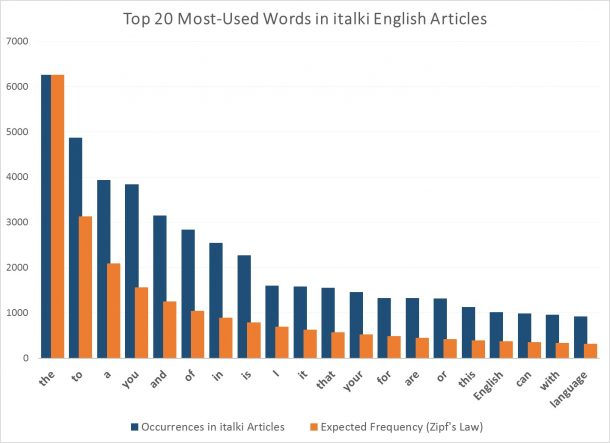

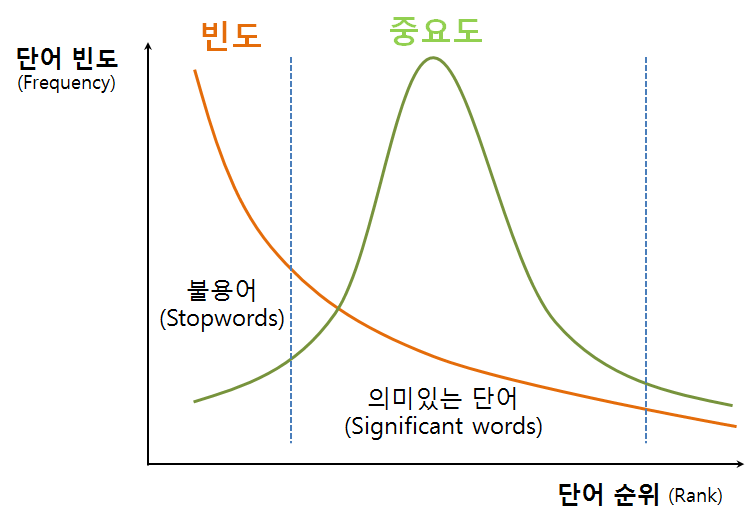

In [7]:
df['preprocessed_text'] = pd.Series(preprocessed_text)
df.head()

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수,연결,감사보고서,수주산업,preprocessed_text
0,KR7044180008,9730,코센,코센,"KOSSEN Co.,Ltd.",1990-07-27,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,18814297,1.0,"의견거절\n\n우리는 주식회사 코센과 그 종속기업(이하 ""연결실체"")의 재무제표에 ...",NaN,의견거절우리는 주식회사 코센과 그 종속기업 이하 연결실체 의 재무제표에 대한 감...
1,KR7098460009,16670,인피니티엔티,인피니티엔티,INFINITY NT,1993-04-21,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,100258024,1.0,"감사의견\n우리는 주식회사 인피니티엔티(구, 주식회사 포비스티앤씨)와 그 종속기업(...",NaN,감사의견우리는 주식회사 인피니티엔티 구 주식회사 포비스티앤씨 와 그 종속기업 이하...
2,KR7053270005,6580,대양제지공업,대양제지,DaeyangPaperMfg,1993-12-29,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,26850000,1.0,"감사의견\n우리는 대양제지공업주식회사와 그 종속기업(이하 ""연결회사”)의 연결재무...",NaN,감사의견우리는 대양제지공업주식회사와 그 종속기업 이하 연결회사 의 연결재무제표...
3,KR7293580007,24830,세원물산,세원물산,SewonCorporation,1994-12-29,KOSDAQ,주권,관리종목(소속부없음),보통주,500.0,8350000,1.0,"감사의견\n우리는 별첨된 주식회사 세원물산(이하 ""회사"")의 재무제표를 감사하였습니...",NaN,감사의견우리는 별첨된 주식회사 세원물산 이하 회사 의 재무제표를 감사하였습니다 ...
4,KR7194700001,29480,광무,광무,Kwangmu,1996-08-27,KOSDAQ,주권,관리종목(소속부없음),보통주,100.0,113955215,1.0,"\n감사의견\n\n우리는 주식회사 광무(이하 ""회사"")와 그 종속기업(구, 주식회사...",NaN,감사의견우리는 주식회사 광무 이하 회사 와 그 종속기업 구 주식회사 릭스솔루션...


In [ ]:
df.shape

(520, 16)

In [9]:
df[df['감사보고서'].isnull()]

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수,연결,감사보고서,수주산업,preprocessed_text
65,KR7302430004,127160,매직마이크로,매직마이크로,"MAGICMICRO CO.,LTD",2015-11-19,KOSDAQ,주권,관리종목(소속부없음),보통주,100.0,86623501,NaN,NaN,확인,
130,KR7140520008,35760,씨제이이엔엠,CJ ENM,"CJ ENM CO., Ltd.",1999-11-23,KOSDAQ,주권,우량기업부,보통주,5000.0,21929154,NaN,NaN,확인,
499,KR7330730003,58220,아리온테크놀로지,아리온,ARION TECHNOLOGY INC.,2005-08-05,KOSDAQ,주권,투자주의환기종목(소속부없음),보통주,500.0,38974244,NaN,NaN,확인,
517,KR7044060002,263540,샘코,샘코,Sacheon Aerospace Manufacturing Ind. Co. Ltd,2017-09-15,KOSDAQ,주권,투자주의환기종목(소속부없음),보통주,500.0,5735747,NaN,NaN,확인,


In [10]:
df = df.drop(index = [65, 130, 499, 517])

In [ ]:
df.shape

(516, 16)

In [11]:
df = df.reset_index(drop=True)
df.tail(2)

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수,연결,감사보고서,수주산업,preprocessed_text
514,KR7078650009,950160,코오롱티슈진,코오롱티슈진,"Kolon TissueGene, Inc.",2017-11-06,KOSDAQ,주식예탁증권,투자주의환기종목(소속부없음),보통주,0.0,64920050,NaN,"감사의견\n우리는 Kolon TissueGene, Inc.(이하 '회사')의 재무제...",NaN,감사의견우리는 이하 회사 의 재무제표를 감사하였습니다 해당 재무제표는...
515,KR7263700007,257370,명성티엔에스,명성티엔에스,"Mstns Co.,Ltd.",2018-09-13,KOSDAQ,주권,투자주의환기종목(소속부없음),보통주,500.0,7726156,NaN,"의견거절\n\n \n\n우리는 명성티엔에스 주식회사(이하 ""회사”)의 재무제표에 대...",NaN,의견거절 우리는 명성티엔에스 주식회사 이하 회사 의 재무제표에 대한 감사계약을 ...


In [12]:
df.소속부.unique()

array(['관리종목(소속부없음)', '우량기업부', '투자주의환기종목(소속부없음)'], dtype=object)

In [13]:
df.소속부.value_counts()

우량기업부              408
관리종목(소속부없음)         79
투자주의환기종목(소속부없음)     29
Name: 소속부, dtype: int64

In [14]:
df['Group'] = pd.Series()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [15]:
df['Group'][df['소속부'].isin(['우량기업부'])] = 'Good'
df['Group'][df['소속부'].isin(['관리종목(소속부없음)', '투자주의환기종목(소속부없음)'])] = 'Marginal'
df['Group'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Good        408
Marginal    108
Name: Group, dtype: int64

In [16]:
df = df.sort_values(by='Group')
df = df.reset_index(drop=True)
df.head()

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수,연결,감사보고서,수주산업,preprocessed_text,Group
0,KR7050960004,80220,제주반도체,제주반도체,Jeju Semiconductor Corp.,2005-02-01,KOSDAQ,주권,우량기업부,보통주,500.0,34442833,1.0,"감사의견\n우리는 주식회사 제주반도체와 그 종속기업(이하 ""연결회사"")의 연결재무제...",NaN,감사의견우리는 주식회사 제주반도체와 그 종속기업 이하 연결회사 의 연결재무제표를...,Good
1,KR7339950008,94480,갤럭시아머니트리,갤럭시아머니트리,"GalaxiaMoneytree Co.,Ltd.",2007-07-20,KOSDAQ,주권,우량기업부,보통주,500.0,39229838,1.0,"감사의견\n\n\n\n우리는 갤럭시아머니트리주식회사와 그 종속기업(이하 ""연결기업""...",NaN,감사의견우리는 갤럭시아머니트리주식회사와 그 종속기업 이하 연결기업 의 연결재무제...,Good
2,KR7054800008,78340,컴투스,컴투스,Com2uS Corporation,2007-07-06,KOSDAQ,주권,우량기업부,보통주,500.0,12866420,1.0,"감사의견\n우리는 별첨된 주식회사 컴투스와 그 종속기업(이하 ""연결회사"")의 연결재...",NaN,감사의견우리는 별첨된 주식회사 컴투스와 그 종속기업 이하 연결회사 의 연결재무제...,Good
3,KR7143160000,95660,네오위즈,네오위즈,NEOWIZ,2007-07-02,KOSDAQ,주권,우량기업부,보통주,500.0,22033719,1.0,"감사의견\n우리는 별첨된 주식회사 네오위즈와 그 종속기업(이하 ""연결회사"")의 연결...",NaN,감사의견우리는 별첨된 주식회사 네오위즈와 그 종속기업 이하 연결회사 의 연결재무...,Good
4,KR7067390005,86450,동국제약,동국제약,"DongKook Pharmaceutical Co.,Ltd.",2007-05-29,KOSDAQ,주권,우량기업부,보통주,500.0,44460000,1.0,"감사의견\n\n우리는 별첨된 동국제약 주식회사와 그 종속기업(이하 ""연결회사"")의 ...",NaN,감사의견우리는 별첨된 동국제약 주식회사와 그 종속기업 이하 연결회사 의 연결재무...,Good


In [17]:
df.preprocessed_text

0      감사의견우리는 주식회사 제주반도체와 그 종속기업 이하  연결회사  의 연결재무제표를...
1      감사의견우리는 갤럭시아머니트리주식회사와 그 종속기업 이하  연결기업  의 연결재무제...
2      감사의견우리는 별첨된 주식회사 컴투스와 그 종속기업 이하  연결회사  의 연결재무제...
3      감사의견우리는 별첨된 주식회사 네오위즈와 그 종속기업 이하  연결회사  의 연결재무...
4      감사의견우리는 별첨된 동국제약 주식회사와 그 종속기업 이하  연결회사  의 연결재무...
                             ...                        
511    의견거절우리는 주식회사 인트로메딕과 그 종속기업 이하  연결회사  의 연결재무제표에...
512    의견거절우리는 주식회사 휴센텍 이하  회사  의 재무제표에 대한 감사계약을 체결하였...
513    감사의견우리는 주식회사 에스엘바이오닉스 및 종속기업들 이하  연결회사  의 연결재무...
514    감사의견우리는      이하  회사  의 재무제표를 감사하였습니다  해당 재무제표는...
515    의견거절 우리는 명성티엔에스 주식회사 이하  회사  의 재무제표에 대한 감사계약을 ...
Name: preprocessed_text, Length: 516, dtype: object

https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

## okt.pos 종류

In [ ]:
import konlpy

# tokenization 함수를 만들어둠
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)  ## ,.?!와 문자+숫자+_(\w)와 공백(\s)만 남김  # 앞에 r을 붙여주면 deprecation warning이 안뜸 (raw string으로 declare)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)   # stem=True로 설정하면 동사원형으로 바꿔서 return
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':  # 명사만 남김
            words.append(word)

    words_str = ' '.join(words)
    return words_str


# review_df['Preprocessed_text']를 하나씩 tokenize해서 list로 저장
tokenized_list = []

for text in df['preprocessed_text']:
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))

516


In [ ]:
type(tokenized_list[0])

str

In [ ]:
df['text'] = pd.Series(tokenized_list)
df.head()

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수,연결,감사보고서,수주산업,preprocessed_text,Group,text
0,KR7050960004,80220,제주반도체,제주반도체,Jeju Semiconductor Corp.,2005-02-01,KOSDAQ,주권,우량기업부,보통주,500.0,34442833,1.0,"감사의견\n우리는 주식회사 제주반도체와 그 종속기업(이하 ""연결회사"")의 연결재무제...",NaN,감사의견우리는 주식회사 제주반도체와 그 종속기업 이하 연결회사 의 연결재무제표를...,Good,감사 의견 우리 주식회사 반도체 그 종 기업 이하 연결 회사 의 연결 재무제표 해당...
1,KR7339950008,94480,갤럭시아머니트리,갤럭시아머니트리,"GalaxiaMoneytree Co.,Ltd.",2007-07-20,KOSDAQ,주권,우량기업부,보통주,500.0,39229838,1.0,"감사의견\n\n\n\n우리는 갤럭시아머니트리주식회사와 그 종속기업(이하 ""연결기업""...",NaN,감사의견우리는 갤럭시아머니트리주식회사와 그 종속기업 이하 연결기업 의 연결재무제...,Good,감사 의견 우리 갤럭시 트리 주식회사 그 종 기업 이하 연결 기업 의 연결 재무제표...
2,KR7054800008,78340,컴투스,컴투스,Com2uS Corporation,2007-07-06,KOSDAQ,주권,우량기업부,보통주,500.0,12866420,1.0,"감사의견\n우리는 별첨된 주식회사 컴투스와 그 종속기업(이하 ""연결회사"")의 연결재...",NaN,감사의견우리는 별첨된 주식회사 컴투스와 그 종속기업 이하 연결회사 의 연결재무제...,Good,감사 의견 우리 별 주식회사 컴투스 그 종 기업 이하 연결 회사 의 연결 재무제표 ...
3,KR7143160000,95660,네오위즈,네오위즈,NEOWIZ,2007-07-02,KOSDAQ,주권,우량기업부,보통주,500.0,22033719,1.0,"감사의견\n우리는 별첨된 주식회사 네오위즈와 그 종속기업(이하 ""연결회사"")의 연결...",NaN,감사의견우리는 별첨된 주식회사 네오위즈와 그 종속기업 이하 연결회사 의 연결재무...,Good,감사 의견 우리 별 주식회사 네오위즈 그 종 기업 이하 연결 회사 의 연결 재무제표...
4,KR7067390005,86450,동국제약,동국제약,"DongKook Pharmaceutical Co.,Ltd.",2007-05-29,KOSDAQ,주권,우량기업부,보통주,500.0,44460000,1.0,"감사의견\n\n우리는 별첨된 동국제약 주식회사와 그 종속기업(이하 ""연결회사"")의 ...",NaN,감사의견우리는 별첨된 동국제약 주식회사와 그 종속기업 이하 연결회사 의 연결재무...,Good,감사 의견 우리 별 동국제약 주식회사 그 종 기업 이하 연결 회사 의 연결 재무제표...


##불용어 처리 1음절 삭제

In [ ]:
stopwords = ['감사', '연결', '우리', '재무제표', '사항', '대한', '표시', '관련', '의견', '책임', '회사', '기업', '평가', 
             '대하', '수행', '해당', '보고서', '영진', '공시', '경우', '기구', '공시', '작성', '결론', '포함', '기간', '사용', '재무', '현재' , '대해' ,
             '개별', '경제', '목적', '업무', '진과', '정보', '요약', '단락', '발행', '구심', '항상', '화가', '서일', '이사', '부로', '모든',
             '로부터', '여러', '백만원', '금창', '방법', '일자', '변수', '파악', '완전' ,
             '주식회사', '이하', '재무상태표', '자본변동표', '현금흐름표', '손익계산서', '회계', '정책', '주석', '동일로', '핵심']

In [ ]:
df['text'] = df['text'].map(lambda x:[w for w in x.split(' ') if not w in set(stopwords)]) 

In [ ]:
df.text

0      [반도체, 그, 종, 의, 년, 월, 일, 종료, 보고, 포괄, 유의, 구성, 별,...
1      [갤럭시, 트리, 그, 종, 의, 년, 월, 일과, 년, 월, 일, 종료, 양, 보...
2      [별, 컴투스, 그, 종, 의, 년, 월, 일과, 년, 월, 일, 종료, 양, 보고...
3      [별, 네오위즈, 그, 종, 의, 년, 월, 일과, 년, 월, 일, 종료, 양, 보...
4      [별, 동국제약, 그, 종, 의, 년, 월, 일과, 년, 월, 일, 종료, 보고, ...
                             ...                        
511    [거절, 인트로메딕, 그, 종, 의, 계약, 체결, 년, 월, 일, 종료, 보고, ...
512    [거절, 휴센텍, 의, 계약, 체결, 년, 월, 일, 종료, 보고, 포괄, 유의, ...
513    [에스엘, 바이오, 닉스, 및, 종, 의, 년, 월, 일, 종료, 보고, 포괄, 및...
514    [의, 년, 월, 일과, 년, 월, 일, 종료, 양, 보고, 포괄, 유의, 구성, ...
515    [거절, 명성, 티엔, 에스, 의, 계약, 체결, 년, 월, 일, 종료, 보고, 포...
Name: text, Length: 516, dtype: object

In [ ]:
 # df['text'] = df['text'].map(lambda x:[w for w in x.split(' ') if not w in set(stopwords)]) 

In [ ]:
hangul_1 = regex.compile(r'^\p{Hangul}{1}$')

In [ ]:
df['text'] = df['text'].map(lambda x : [w for w in x if not hangul_1.match(w)])
df['text']

0      [반도체, 종료, 보고, 포괄, 유의, 구성, 상태, 종료, 보고, 재무성, 현금,...
1      [갤럭시, 트리, 일과, 종료, 보고, 포괄, 유의, 구성, 일과, 상태, 종료, ...
2      [컴투스, 일과, 종료, 보고, 포괄, 유의, 구성, 일과, 상태, 종료, 보고, ...
3      [네오위즈, 일과, 종료, 보고, 포괄, 유의, 구성, 상태, 종료, 보고, 재무성...
4      [동국제약, 일과, 종료, 보고, 포괄, 유의, 구성, 일과, 상태, 종료, 보고,...
                             ...                        
511    [거절, 인트로메딕, 계약, 체결, 종료, 보고, 포괄, 유의, 구성, 표명, 거절...
512    [거절, 휴센텍, 계약, 체결, 종료, 보고, 포괄, 유의, 구성, 표명, 거절, ...
513    [에스엘, 바이오, 닉스, 종료, 보고, 포괄, 유의, 구성, 상태, 종료, 보고,...
514    [일과, 종료, 보고, 포괄, 유의, 구성, 일과, 상태, 종료, 보고, 재무성, ...
515    [거절, 명성, 티엔, 에스, 계약, 체결, 종료, 보고, 포괄, 유의, 구성, 표...
Name: text, Length: 516, dtype: object

In [ ]:
len(df['text'][0])

250

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [ ]:
xfit = np.linspace(np.min(x), np.max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])

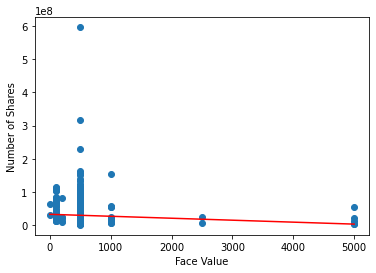

In [ ]:
plt.scatter(x, y)
plt.xlabel('Face Value')
plt.ylabel('Number of Shares')
plt.plot(xfit, yfit, color = 'r')

In [ ]:
print(f'Model slope: {model.coef_[0]}')
print(f'Model intercept: {model.intercept_}')

Model slope: -5906.456392645419
Model intercept: 32936370.654100876


In [ ]:
import statsmodels.api as sm
model = sm.OLS.from_formula('상장주식수 ~ 액면가', data= df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  상장주식수   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.674
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.103
Time:                        03:26:48   Log-Likelihood:                -9758.0
No. Observations:                 516   AIC:                         1.952e+04
Df Residuals:                     514   BIC:                         1.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.294e+07   2.59e+06     12.734      0.000    2.79e+07     3.8e+07
액면가        -5906.4564   3611.976     -1.635      0.103    -1.3e+04    1189.596
==============================================================================
Omnibus:                      730.504   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167238.297
Skew:                           7.319   Prob(JB):                         0.00
Kurtosis:                      89.973   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 빈도수 세기

*   우량기업





In [ ]:
len(df['text'][df['Group'] == 'Good'])

408

In [ ]:
text_good = []
for i in range(408):
  text_good.extend(str(df['text'][i]).split(' '))

len(text_good)

90932

In [ ]:
from collections import Counter
    
text_good_counter = Counter(text_good)
text_good_counter.most_common

<bound method Counter.most_common of Counter({"'유의',": 1713, "'수익',": 1377, "'보고',": 1370, "'근거',": 1329, "'기준',": 1279, "'인식',": 1269, "'판단',": 1148, "'계약',": 1130, "'자산',": 1033, "'종료',": 1022, "'절차',": 994, "'매출',": 962, "'요구사항',": 922, "'윤리',": 905, "'추정',": 864, "'대한민국',": 853, "'관점',": 836, "'검토',": 814, "'전문가',": 775, "'왜곡',": 765, "'입수',": 747, "'기술',": 742, "'증거',": 719, "'주요',": 706, "'발생',": 694, "'거래',": 689, "'금액',": 686, "'위험',": 677, "'내부통제',": 670, "'가치',": 667, "'부정',": 657, "'손상',": 656, "'확인',": 629, "'회계기준',": 607, "'지배',": 599, "'합리',": 598, "'결정',": 588, "'현금',": 577, "'흐름',": 575, "'일과',": 574, "'원가',": 564, "'적정',": 559, "'전체',": 543, "'계속',": 540, "'한국',": 526, "'제공',": 524, "'채택',": 522, "'국제',": 520, "'식별',": 520, "'영향',": 518, "'로서',": 513, "'다음',": 505, "'재고',": 501, "'이행',": 499, "'독립',": 493, "'가장',": 487, "'존재',": 482, "'영업',": 479, "'기타',": 466, "'경영',": 462, "'오류로',": 462, "'회계감사',": 457, "'중요성',": 451, "'재무성',": 445, "'커뮤니케이션',": 445, "'구성',": 437, "'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_

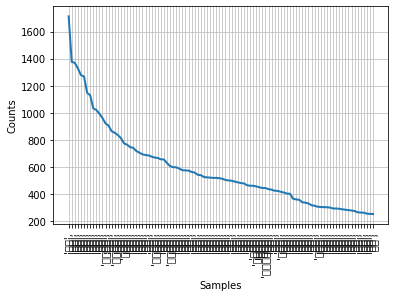

In [ ]:
from nltk import Text

text = Text(text_good)
text.plot(100)
plt.show()



*   한계기업


In [ ]:
len(df['text'][df['Group'] == 'Marginal'])

108

In [ ]:
text_marginal = []
for i in range(108):
  text_marginal.extend(str(df['text'][i]).split())

len(text_marginal)

22853

In [ ]:
from collections import Counter
    
text_marginal_counter = Counter(text_marginal)
text_marginal_counter.most_common

<bound method Counter.most_common of Counter({"'유의',": 434, "'보고',": 341, "'수익',": 333, "'기준',": 327, "'근거',": 326, "'인식',": 325, "'자산',": 322, "'판단',": 312, "'매출',": 309, "'계약',": 290, "'종료',": 253, "'절차',": 244, "'요구사항',": 240, "'추정',": 239, "'윤리',": 234, "'대한민국',": 226, "'관점',": 223, "'재고',": 198, "'손상',": 196, "'검토',": 195, "'전문가',": 194, "'확인',": 187, "'기술',": 185, "'주요',": 185, "'입수',": 183, "'금액',": 181, "'증거',": 179, "'발생',": 173, "'결정',": 170, "'일과',": 166, "'거래',": 165, "'왜곡',": 158, "'회계기준',": 157, "'위험',": 155, "'현금',": 154, "'가치',": 153, "'내부통제',": 153, "'흐름',": 151, "'전체',": 144, "'영업',": 141, "'한국',": 135, "'이행',": 134, "'제공',": 134, "'채택',": 133, "'국제',": 133, "'다음',": 132, "'지배',": 132, "'부정',": 131, "'독립',": 130, "'로서',": 129, "'경영',": 129, "'적정',": 128, "'합리',": 128, "'가장',": 127, "'원가',": 125, "'중요성',": 123, "'회계감사',": 122, "'영향',": 121, "'기타',": 119, "'구성',": 117, "'재무성',": 116, "'존재',": 114, "'별도',": 114, "'상태',": 110, "'포괄',": 109, "'형성',": 109, "'식별',": 109, "'계

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_

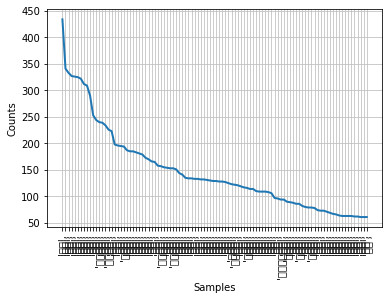

In [ ]:
from nltk import Text

text = Text(text_marginal)
text.plot(100)
plt.show()

## 워드 클라우드

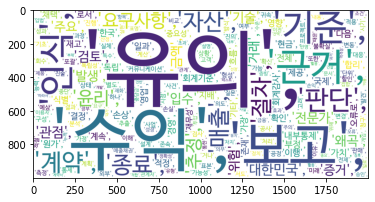

In [ ]:
# 우량기업 클라우드

from wordcloud import WordCloud
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               background_color = 'white',
               width=1000, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(text_good_counter)
plt.figure()
plt.imshow(gen)

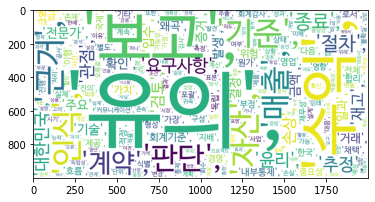

In [ ]:
#한계기업
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               background_color = 'white',
               width=1000, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(text_marginal_counter)
plt.figure()
plt.imshow(gen)

### 전체로

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2) # 이부분 고치기 ngram
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram 미포함 

feat_vect = count_vectorizer.fit_transform(tokenized_list)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (516, 1000)


In [ ]:
tokenized_list[0:407]

In [ ]:
lda = LatentDirichletAllocation(n_components=10)  # 토픽 수
lda.fit(feat_vect)

LatentDirichletAllocation()

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 10)

Topic # 0
상장폐지 심사 개선 상장 위원회 코스닥시장 심의 규정 실질 제출
Topic # 1
개발 분할 게임 무형 어떠한 충족 자본 자의 형태 한편
Topic # 2
법인세 채무 한정 지급 제거 집계 매입 복잡 의사록 이사회
Topic # 3
분류 재작성 수수료 해외 관측 반품 기법 시스템 상품 데이터
Topic # 4
공사 청구 입법 건설 예정 원인 지연 파악 국외 현장
Topic # 5
전환사채 객관성 영구 파생상품 민감 모형 결합 매년 차손 의해
Topic # 6
상품 대손충당금 신용 설정 대출 산출 계약금 분류 부도 경상
Topic # 7
없었습니다 거절 확보 자금 유동 수도 필요한지 본인 체적 구성요소
Topic # 8
장비 생산 인도 주문 배분 코로나바이러스 감염증 확산 세부 관심
Topic # 9
주식 억원 진부 부합 차손 신규 최근 설정 대여 자의


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 776 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1697199d72474baec0656d41d5fb01bc1928ee00e739355c1eb092b2bfb95ff6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-on

## 우량기업 LDA

In [ ]:
def listtostring(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

In [ ]:
len(df['text'])

516

In [ ]:
tokenized_list_all = []
for i in range(516):
  tokenized_list_all.append(listtostring(df['text'][i]))

len(tokenized_list_all)

516

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
tokenized_list_good = tokenized_list_all[0:408]
tokenized_list_marginal = tokenized_list_all[408:]

In [ ]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.05, max_features=1000, min_df=3)
    # 3개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외

feat_vect_good = count_vectorizer.fit_transform(tokenized_list_good)
print('CountVectorizer Shape:', feat_vect_marginal.shape)

CountVectorizer Shape: (408, 489)


In [ ]:
lda_good = LatentDirichletAllocation(n_components=5)  # 토픽 수
lda_good.fit(feat_vect_good)

LatentDirichletAllocation(n_components=5)

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda_good, feature_names, 20)

NameError: ignored

In [ ]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis_good = pyLDAvis.sklearn.prepare(lda_good, feat_vect_good, count_vectorizer)
pyLDAvis.display(vis_good)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


## 한계기업 LDA

In [ ]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2)
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect_marginal = count_vectorizer.fit_transform(tokenized_list_marginal)
print('CountVectorizer Shape:', feat_vect_marginal.shape)

CountVectorizer Shape: (108, 492)


In [ ]:
lda_marginal = LatentDirichletAllocation(n_components=5)  # 토픽 수
lda_marginal.fit(feat_vect_marginal)

LatentDirichletAllocation(n_components=5)

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda_marginal, feature_names, 10)

Topic # 0
재화 억원 용역 처분 대손충당금 매입 대가 유통 신규 장비
Topic # 1
실체 원가 한정 실현 공사 충당금 건설 청구 투입 가격
Topic # 2
회생 건설 충당 개시 감가상각 종결 부회 관리제 거래처 의무
Topic # 3
개발 소송 연구개발 경상 회차 주주 담보 최대 사채 바이오
Topic # 4
회생 조사 처분 법원 인수 아래 신청 보통주 서술 지연


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis_marginal = pyLDAvis.sklearn.prepare(lda_good, feat_vect_marginal, count_vectorizer)
pyLDAvis.display(vis_marginal)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


## Tomotopy 사용

In [ ]:
df.head(2)

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수,연결,감사보고서,수주산업,preprocessed_text,Group,text
0,KR7050960004,80220,제주반도체,제주반도체,Jeju Semiconductor Corp.,2005-02-01,KOSDAQ,주권,우량기업부,보통주,500.0,34442833,1.0,"감사의견\n우리는 주식회사 제주반도체와 그 종속기업(이하 ""연결회사"")의 연결재무제...",NaN,감사의견우리는 주식회사 제주반도체와 그 종속기업 이하 연결회사 의 연결재무제표를...,Good,"[반도체, 종료, 보고, 포괄, 유의, 구성, 상태, 종료, 보고, 재무성, 현금,..."
1,KR7339950008,94480,갤럭시아머니트리,갤럭시아머니트리,"GalaxiaMoneytree Co.,Ltd.",2007-07-20,KOSDAQ,주권,우량기업부,보통주,500.0,39229838,1.0,"감사의견\n\n\n\n우리는 갤럭시아머니트리주식회사와 그 종속기업(이하 ""연결기업""...",NaN,감사의견우리는 갤럭시아머니트리주식회사와 그 종속기업 이하 연결기업 의 연결재무제...,Good,"[갤럭시, 트리, 일과, 종료, 보고, 포괄, 유의, 구성, 일과, 상태, 종료, ..."


In [ ]:
## 토크나이징 함수 선언
def tokenize(sent):
    res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
    return [word + ('다' if tag.startswith('V') else '') # 동사에는 '다'를 붙여줌
            for word, tag, _, _ in res
            if not tag.startswith('E') and not tag.startswith('J') and not tag.startswith('S')] # 조사, 어미, 특수기호 포함된 단어는 제거

In [ ]:
## 토크나이징 함수 선언 (품사 포함)
def tokenize_tag(sent):
    res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
    return [word + ('다' if tag.startswith('V') else '') +'/'+tag # 동사에는 '다'를 붙여줌 + / 품사
            for word, tag, _, _ in res
            if not tag.startswith('E') and not tag.startswith('J') and not tag.startswith('S')] # 조사, 어미, 특수기호 포함된 단어는 제거

In [ ]:
df.columns

Index(['표준코드', '단축코드', '한글 종목명', '한글 종목약명', '영문 종목명', '상장일', '시장구분', '증권구분',
       '소속부', '주식종류', '액면가', '상장주식수', '연결', '감사보고서', '수주산업',
       'preprocessed_text', 'Group', 'text'],
      dtype='object')

In [ ]:
# token이라는 컬럼에 토크나이징 결과를 넣는다.
df['token'] = df['preprocessed_text'].progress_map(lambda x:tokenize(x)) 

  0%|          | 0/516 [00:00<?, ?it/s]

In [ ]:
df['token']

0      [감사, 의견, 우리다, 주식회사, 제주, 반도체, 그, 종속, 기업, 이하, 연결...
1      [감사, 의견, 우리, 갤럭시, 머니, 트리, 주식회사, 그, 종속, 기업, 이하,...
2      [감사, 의견, 우리, 별, 첨, 되, 주식회사, 컴투스, 그, 종속, 기업, 이하...
3      [감사, 의견, 우리, 별, 첨, 되, 주식회사, 네오위즈, 그, 종속, 기업, 이...
4      [감사, 의견, 우리, 별, 첨, 되, 동국, 제약, 주식회사, 그, 종속, 기업,...
                             ...                        
511    [의견, 거절, 우리다, 주식회사, 인트로메딕과, 그, 종속, 기업, 이하, 연결,...
512    [의견, 거절, 우리다, 주식회사, 휴센텍, 이하, 회사, 재무제표, 대하다, 감사...
513    [감사, 의견, 우리다, 주식회사, 에스엘바이오닉스, 및, 종속, 기업, 들, 이하...
514    [감사, 의견, 우리, 이하, 회사, 재무제표, 감사, 하, 해당, 재무제표, 년,...
515    [의견, 거절, 우리, 명성, 티, 에스, 주식회사, 이하, 회사, 재무제표, 대하...
Name: token, Length: 516, dtype: object

In [ ]:
df['token'] = df['token'].map(lambda x:[w for w in x if not w in set(stopwords)]) 

In [ ]:
hangul_1 = regex.compile(r'^\p{Hangul}{1}$')

In [ ]:
df['token'] = df['token'].map(lambda x:[w for w in x if not hangul_1.match(w)])

In [ ]:
LDA = tp.LDAModel(k=10,min_df=10,tw=tp.TermWeight.IDF,rm_top=10, seed=0) 

In [ ]:
for token in tqdm(df['token'].tolist()):
    LDA.add_doc(token)

  0%|          | 0/516 [00:00<?, ?it/s]

In [ ]:
# 학습 준비
LDA.train(0)

In [ ]:
# 한번에 20회씩 총 500회 학습
print('Num docs:', len(LDA.docs), ', Vocab size:', LDA.num_vocabs, ', Num words:', LDA.num_words)
print('Removed top words:', LDA.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 500, 20):
    LDA.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, LDA.ll_per_word))

Training...


Num docs: 516 , Vocab size: 634 , Num words: 126658
Removed top words: ['대하다', '있다', '이다', '따르다', '유의', '기준', '중요', '근거', '경영진', '보고']
Iteration: 0	Log-likelihood: -5.7904806953811025
Iteration: 20	Log-likelihood: -5.7400342436068055
Iteration: 40	Log-likelihood: -5.7083785398682
Iteration: 60	Log-likelihood: -5.691627718835841
Iteration: 80	Log-likelihood: -5.68162420848345
Iteration: 100	Log-likelihood: -5.671033046190889
Iteration: 120	Log-likelihood: -5.657712358636842
Iteration: 140	Log-likelihood: -5.650468332132411
Iteration: 160	Log-likelihood: -5.649049190475459
Iteration: 180	Log-likelihood: -5.6463028081380235
Iteration: 200	Log-likelihood: -5.642663535779608
Iteration: 220	Log-likelihood: -5.64188767187295
Iteration: 240	Log-likelihood: -5.636379711649367
Iteration: 260	Log-likelihood: -5.638487296181857
Iteration: 280	Log-likelihood: -5.638634977436759
Iteration: 300	Log-likelihood: -5.6373944169005465
Iteration: 320	Log-likelihood: -5.635666388232082
Iteration: 340	Log-li

In [ ]:
# 학습 결과
LDA.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 516 docs, 126658 words
| Total Vocabs: 2823, Used Vocabs: 634
| Entropy of words: 5.71622
| Entropy of term-weighted words: 6.11472
| Removed Vocabs: 대하다 있다 이다 따르다 유의 기준 중요 근거 경영진 보고
|
<Training Info>
| Iterations: 500, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -5.62889
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 0 (minimum collection frequency of words)
| min_df: 10 (minimum document frequency of words)
| rm_top: 10 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 0 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distribut

In [ ]:
for i in range(LDA.k):
    res = LDA.get_topic_words(i, top_n=10) # top 10
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	상장, 심사, 개선, 코스닥, 위원회, 규정, 심의, 폐지, 사유, 실질
Topic #1	실체, 해외, 지급, 법인세, 부채, 반품, 생산, 기울이다, 주문, 영역
Topic #2	수익, 매출, 인식, 제품, 재화, 귀속, 추출, 대가, 판매, 표본
Topic #3	손상, 가치, 단위, 창출, 금융, 할인, 성장, 영업, 가정, 측정
Topic #4	거절, 수정, 없다, 확보, 계속, 자금, 부채, 백만, 조정, 전환
Topic #5	재고, 자산, 실현, 충당금, 실사, 가치, 진부, 본인, 실재, 가격
Topic #6	원가, 공사, 계약, 진행, 투입, 청구, 프로젝트, 변경, 변동, 건설
Topic #7	개발비, 무형, 배분, 결합, 개발, 한정, 인수, 취득, 가격, 매수
Topic #8	왜곡, 부정, 계속, 지배, 커뮤니케이션, 인하다, 시키, 오류, 내리다, 확신
Topic #9	특수, 관계자, 신용, 채권, 손실, 잔액, 충당금, 기대, 대손, 매출채권


In [ ]:
# 토픽 제목 자동으로 붙이기(참고)
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=100, max_len=5, max_cand=10000)
cands = extractor.extract(LDA)

labeler = tp.label.FoRelevance(LDA, cands, min_df=100, smoothing=1e-2, mu=0.25)
for k in range(LDA.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in LDA.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: 강조 영향, 강조, 강조 영향 미치다 않다, 강조 영향 미치다, 영향 미치다 않다
상장	0.07123622298240662
심사	0.04966322332620621
개선	0.04637725278735161
코스닥	0.037911202758550644
위원회	0.03715840354561806
규정	0.036166779696941376
심의	0.03476670756936073
폐지	0.03436710685491562
사유	0.030177604407072067
실질	0.028812861070036888

== Topic #1 ==
Labels: 고객, 불확실, 기울이다, 대하다 기술, 기술 있다 같이
실체	0.1608876734972
해외	0.03671453893184662
지급	0.02817625179886818
법인세	0.027608754113316536
부채	0.022552000358700752
반품	0.02192709408700466
생산	0.020755017176270485
기울이다	0.02016073651611805
주문	0.019103126600384712
영역	0.017953472211956978

== Topic #2 ==
Labels: 매출 거래, 지표, 이전, 시점, 귀속
수익	0.042620785534381866
매출	0.030182285234332085
인식	0.024592768400907516
제품	0.017625857144594193
재화	0.015033884905278683
귀속	0.014555699191987514
추출	0.014461946673691273
대가	0.014376699924468994
판매	0.013957730494439602
표본	0.013716345652937889

== Topic #3 ==
Labels: 할인, 창출, 주요 가정, 적격, 가치
손상	0.04799197241663933
가치	0.03958256542682648
단위	0.03221265971660614
창출	0

## Group 나눠서

In [ ]:
df.columns

Index(['표준코드', '단축코드', '한글 종목명', '한글 종목약명', '영문 종목명', '상장일', '시장구분', '증권구분',
       '소속부', '주식종류', '액면가', '상장주식수', '연결', '감사보고서', '수주산업',
       'preprocessed_text', 'Group', 'text', 'token'],
      dtype='object')

In [ ]:
DMR = tp.DMRModel(k=10,min_df=100,tw=tp.TermWeight.PMI,rm_top=3, seed=2021)

In [ ]:
token_politics_dict = df[['token','Group']].to_dict('index')

In [ ]:
for k in tqdm(token_politics_dict.keys()):
    DMR.add_doc(token_politics_dict[k]['token'],token_politics_dict[k]['Group'])

  0%|          | 0/516 [00:00<?, ?it/s]

In [ ]:
DMR.train(0)

In [ ]:
# 한번에 20회씩 총 500회 학습
print('Num docs:', len(DMR.docs), ', Vocab size:', DMR.num_vocabs, ', Num words:', DMR.num_words)
print('Removed top words:', DMR.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 500, 20):
    DMR.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, DMR.ll_per_word))

Training...


Num docs: 516 , Vocab size: 225 , Num words: 115650
Removed top words: ['대하다', '있다', '이다']
Iteration: 0	Log-likelihood: -4.893142171118021
Iteration: 20	Log-likelihood: -4.817142846486019
Iteration: 40	Log-likelihood: -4.804329619654257
Iteration: 60	Log-likelihood: -4.7884457953090225
Iteration: 80	Log-likelihood: -4.7761929507592225
Iteration: 100	Log-likelihood: -4.766187645457444
Iteration: 120	Log-likelihood: -4.758277191415789
Iteration: 140	Log-likelihood: -4.75777035288458
Iteration: 160	Log-likelihood: -4.747801502340171
Iteration: 180	Log-likelihood: -4.744863892578109
Iteration: 200	Log-likelihood: -4.749598700242292
Iteration: 220	Log-likelihood: -4.746493860143892
Iteration: 240	Log-likelihood: -4.747395731905428
Iteration: 260	Log-likelihood: -4.744044763421008
Iteration: 280	Log-likelihood: -4.739577416261902
Iteration: 300	Log-likelihood: -4.737159331414193
Iteration: 320	Log-likelihood: -4.7410966960654415
Iteration: 340	Log-likelihood: -4.7358224935883335
Iteration: 3

In [ ]:
for i in range(DMR.k):
    res = DMR.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	전기, 영향, 기울이다, 설명, 같이, 반영, 강조, 미치다, 불확실, 백만
Topic #1	왜곡, 부정, 중요, 지배, 계속, 커뮤니케이션, 오류, 인하다, 합리, 경영진
Topic #2	판매, 고객, 측정, 집합, 시점, 통하다, 정확, 계산, 처리, 활동
Topic #3	계약, 변동, 금액, 추정, 수익, 발생, 산정, 주요, 문서, 확실
Topic #4	가치, 공정, 측정, 사업, 수준, 손익, 외부, 전문가, 적격, 백만
Topic #5	없다, 하다, 충분, 계속, 증거, 범위, 표명, 백만, 적합, 거래
Topic #6	매출, 수익, 인식, 귀속, 추출, 표본, 이전, 시점, 고객, 발생
Topic #7	손상, 현금, 창출, 영업, 할인, 가치, 추정, 가정, 경영진, 흐름
Topic #8	자산, 가능, 관계, 회수, 검토, 계산, 확인, 검증, 장부, 금액
Topic #9	따르다, 거래, 관점, 대한민국, 동일, 기준, 다루다, 지다, 종료, 윤리


In [ ]:
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=100, max_len=5, max_cand=10000)
cands = extractor.extract(DMR)

labeler = tp.label.FoRelevance(DMR, cands, min_df=100, smoothing=1e-2, mu=0.25)
for k in range(DMR.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in DMR.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: 강조 영향, 강조 영향 미치다, 강조 영향 미치다 않다, 미치다 않다, 영향 미치다 않다
전기	0.0500200018286705
영향	0.04151669889688492
기울이다	0.041391521692276
설명	0.03869657218456268
같이	0.03862385451793671
반영	0.03608763590455055
강조	0.036008723080158234
미치다	0.03440685197710991
불확실	0.032833218574523926
백만	0.030964048579335213

== Topic #1 ==
Labels: 그러나 내부통제 효과 대하다, 그러나 내부통제 효과, 그러나 내부통제, 내부통제 효과 대하다, 아니다 위하다
왜곡	0.04713587090373039
부정	0.04113122075796127
중요	0.03255821391940117
지배	0.029659328982234
계속	0.029485953971743584
커뮤니케이션	0.028469588607549667
오류	0.025649167597293854
인하다	0.025096304714679718
합리	0.0239249337464571
경영진	0.020825950428843498

== Topic #2 ==
Labels: 판매, 고객, 설계, 법규, 이다 결정
판매	0.15038001537322998
고객	0.09106386452913284
측정	0.0670204758644104
집합	0.06591428071260452
시점	0.06453067809343338
통하다	0.04607884958386421
정확	0.03330713137984276
계산	0.032688792794942856
처리	0.030820991843938828
활동	0.028373025357723236

== Topic #3 ==
Labels: 변동, 계약, 조건, 계약서, 문서
계약	0.25750911235809326
변동	0.05907702445983887
금

In [ ]:
DMR.metadata_dict

['Good', 'Marginal']

Topic rate by groups
Good [0.06825928 0.08625758 0.04038417 0.11414908 0.03392364 0.02921383
 0.18807176 0.07550429 0.10842937 0.25580695] 

Marginal [0.29825896 0.06790815 0.02247448 0.04540466 0.04486769 0.0649066
 0.06183071 0.06478447 0.2016463  0.12791793] 



findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


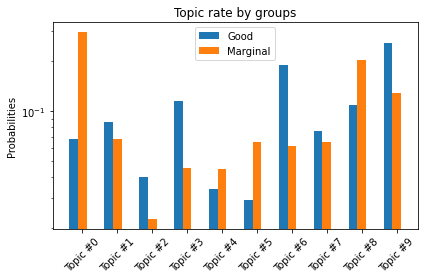

In [ ]:
# calculate topic distribution for each metadata using softmax
probs = np.exp(DMR.lambdas - DMR.lambdas.max(axis=0))
probs /= probs.sum(axis=0)

print('Topic rate by groups')
for f, metadata_name in enumerate(DMR.metadata_dict):
    print(metadata_name, probs[:, f], '\n')

x = np.arange(DMR.k)
width = 1 / (DMR.f + 2)

fig, ax = plt.subplots()
for f, metadata_name in enumerate(DMR.metadata_dict):
    ax.bar(x + width * (f - DMR.f / 2), probs[:, f], width, label=DMR.metadata_dict[f])

ax.set_ylabel('Probabilities')
ax.set_yscale('log')
ax.set_title('Topic rate by groups')
ax.set_xticks(x)
ax.set_xticklabels(['Topic #{}'.format(k) for k in range(DMR.k)],rotation=45) # x축 라벨 45도로 회전
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
for i in range(DMR.k):
    res = DMR.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	전기, 영향, 기울이다, 설명, 같이, 반영, 강조, 미치다, 불확실, 백만
Topic #1	왜곡, 부정, 중요, 지배, 계속, 커뮤니케이션, 오류, 인하다, 합리, 경영진
Topic #2	판매, 고객, 측정, 집합, 시점, 통하다, 정확, 계산, 처리, 활동
Topic #3	계약, 변동, 금액, 추정, 수익, 발생, 산정, 주요, 문서, 확실
Topic #4	가치, 공정, 측정, 사업, 수준, 손익, 외부, 전문가, 적격, 백만
Topic #5	없다, 하다, 충분, 계속, 증거, 범위, 표명, 백만, 적합, 거래
Topic #6	매출, 수익, 인식, 귀속, 추출, 표본, 이전, 시점, 고객, 발생
Topic #7	손상, 현금, 창출, 영업, 할인, 가치, 추정, 가정, 경영진, 흐름
Topic #8	자산, 가능, 관계, 회수, 검토, 계산, 확인, 검증, 장부, 금액
Topic #9	따르다, 거래, 관점, 대한민국, 동일, 기준, 다루다, 지다, 종료, 윤리


https://chaelist.github.io/docs/ml_application/topic_modeling/



https://happy-obok.tistory.com/5#topic=0&lambda=1&term=